Linear Regression

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
Defense = pd.read_csv('Defense/clean_defense.csv')
Defense = Defense.replace(np.nan, 0)
Defense.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round
0,1,2000,Brian Young,DE,47.0,Texas-El Paso,College Stats,74.0,278.0,4.94,29.5,27.0,106.0,7.20,4.47,St. Louis Rams,5.0
1,2,2000,Cedric Woodard,DT,15.0,Texas,0,74.0,290.0,5.21,30.5,23.0,109.0,0.00,0.00,Baltimore Ravens,6.0
2,3,2000,Antonio Wilson,OLB,2.0,Texas A&M-Commerce,0,74.0,245.0,4.56,0.0,11.0,0.0,0.00,0.00,Minnesota Vikings,4.0
3,4,2000,Josh Williams,DT,19.0,Michigan,0,75.0,282.0,4.90,30.5,0.0,111.0,7.22,4.25,Indianapolis Colts,4.0
4,5,2000,Damen Wheeler,CB,0.0,Colorado,0,69.0,179.0,4.51,35.0,11.0,115.0,7.21,4.27,San Diego Chargers,6.0


In [123]:
X = Defense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Defense["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2726, 8) (2726, 1)


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [126]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.01086439900930769
Testing Score: 0.004958551553281509


Text(0.5, 1.0, 'Residual Plot')

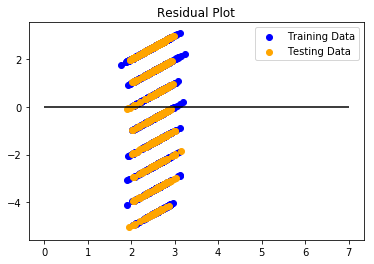

In [127]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [88]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

In [90]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.537748982150195
R-squared (R2 ): 0.010507406742532255


In [92]:
model.score(X, y)

0.010507406742532253

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
model.score(X_test, y_test)

0.004958551553281509

Logistic Regression

In [110]:
XDefense = Defense.drop(columns=["Rk","Year","Player","Pos","AV","School","College","Drafted"])

In [111]:
X = XDefense
y = Defense["Round"]
print(X.shape, y.shape)

(2726, 9) (2726,)


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [113]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7436399217221135
Testing Data Score: 0.7140762463343109


In [116]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1. 3. 7. 2. 0. 1. 5. 0. 0. 3.]
First 10 Actual labels: [1.0, 4.0, 7.0, 2.0, 0.0, 2.0, 3.0, 0.0, 0.0, 2.0]


In [117]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1.0,1.0
1,3.0,4.0
2,7.0,7.0
3,2.0,2.0
4,0.0,0.0
5,1.0,2.0
6,5.0,3.0
7,0.0,0.0
8,0.0,0.0
9,3.0,2.0
